### Importing Libraries

In [50]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import dataframe_image as dfi

In [51]:
directory = 'data'
def get_state_data(state_code): 
    ls = []
    ls_for_index = []
    for index, filename in enumerate(os.scandir(directory)):
        if filename.is_file():
            if str(filename.path).startswith(f'data\CoWIN_IN_{state_code}_2021'):
                f = open(filename.path,)
                data = json.load(f)
                ls.append(data)
                ls_for_index.append(' '.join(list(filename.path.split('\\')[1].split('.')[0].split(f'{state_code}_')[1].split('-'))))
    return ls, ls_for_index

In [52]:
def get_state_dfs(state_code):
    ls, ls_for_index = get_state_data(state_code)
    df = pd.DataFrame() 
    df['date-index'] = ls_for_index
    df['date-index'] =  pd.to_datetime(df['date-index'], format='%Y %m %d')
    df.reset_index().set_index('date-index')
    ls_total_sites = []
    for i in range(len(ls)):
        try:
            ls_total_sites.append(ls[i]['topBlock']['sites']['total'])
        except:
            ls_total_sites.append(None)
    df['total_sites'] = ls_total_sites

    ls_govt_sites = []
    for i in range(len(ls)):
        try:
            ls_govt_sites.append(ls[i]['topBlock']['sites']['govt'])
        except:
            ls_govt_sites.append(None)
    df['govt_sites'] = ls_govt_sites

    ls_pvt_sites = []
    for i in range(len(ls)):
        try:
            ls_pvt_sites.append(ls[i]['topBlock']['sites']['pvt'])
        except:
            ls_pvt_sites.append(None)
    df['pvt_sites'] = ls_pvt_sites
    df = df.reset_index(drop=True)

    ls_total_sessions = []
    for i in range(len(ls)):
        try:
            ls_total_sessions.append(ls[i]['topBlock']['sessions']['total'])
        except:
            ls_total_sessions.append(None)
    df['total_sessions'] = ls_total_sessions

    ls_govt_sessions = []
    for i in range(len(ls)):
        try:
            ls_govt_sessions.append(ls[i]['topBlock']['sessions']['govt'])
        except:
            ls_govt_sessions.append(None)
    df['govt_sessions'] = ls_govt_sessions

    ls_pvt_sessions = []
    for i in range(len(ls)):
        try:
            ls_pvt_sessions.append(ls[i]['topBlock']['sessions']['pvt'])
        except:
            ls_pvt_sessions.append(None)
    df['pvt_sessions'] = ls_pvt_sessions

    ls_total_vaccine_cumulative = []
    for i in range(len(ls)):
        try:
            ls_total_vaccine_cumulative.append(ls[i]['topBlock']['vaccination']['total'])
        except:
            ls_total_vaccine_cumulative.append(None)
    df['total_vacc_cumulative'] = ls_total_vaccine_cumulative

    ls_vac_male = []
    for i in range(len(ls)):
        try:
            ls_vac_male.append(ls[i]['topBlock']['vaccination']['male'])
        except:
            ls_vac_male.append(None)
    df['vacc_male'] = ls_vac_male

    ls_vac_female = []
    for i in range(len(ls)):
        try:
            ls_vac_female.append(ls[i]['topBlock']['vaccination']['female'])
        except:
            ls_vac_female.append(None)
    df['vacc_female'] = ls_vac_female
    
    ls_vac_others = []
    for i in range(len(ls)):
        try:
            ls_vac_others.append(ls[i]['topBlock']['vaccination']['others'])
        except:
            ls_vac_others.append(None)
    df['vacc_others'] = ls_vac_others

    ls_covishield = []
    for i in range(len(ls)):
        try:
            ls_covishield.append(ls[i]['topBlock']['vaccination']['covishield'])
        except:
            ls_covishield.append(None)
    df['covishield'] = ls_covishield
    
    ls_covaxin = []
    for i in range(len(ls)):
        try:
            ls_covaxin.append(ls[i]['topBlock']['vaccination']['covaxin'])
        except:
            ls_covaxin.append(None)
    df['covaxin'] = ls_covaxin
    
    ls_today = []
    for i in range(len(ls)):
        try:
            ls_today.append(ls[i]['topBlock']['vaccination']['today'])
        except:
            ls_today.append(None)
    df['today'] = ls_today
    
    ls_total_dose_1 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_1.append(ls[i]['topBlock']['vaccination']['tot_dose_1'])
        except:
            ls_total_dose_1.append(None)
    df['total_dose_1'] = ls_total_dose_1
    
    ls_total_dose_2 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_2.append(ls[i]['topBlock']['vaccination']['tot_dose_2'])
        except:
            ls_total_dose_2.append(None)
    df['total_dose_2'] = ls_total_dose_2
    
    ls_total_doses = []
    for i in range(len(ls)):
        try:
            ls_total_doses.append(ls[i]['topBlock']['vaccination']['total_doses'])
        except:
            ls_total_doses.append(None)
    df['total_doses'] = ls_total_doses
    
    ls_district_id = []
    ls_id = []
    ls_title = []
    ls_district_name = []
    ls_vacc_district = []
    ls_total_vacc_district = []
    ls_partial_vacc_district = []
    df_district = pd.DataFrame() 
    for i in range(len(ls)):
        for j in range(len((ls[i]['getBeneficiariesGroupBy']))):
            try:
                ls_district_id.append(ls[i]['getBeneficiariesGroupBy'][j]['district_id'])
            except:
                ls_district_id.append(None)
            try:
                ls_id.append(ls[i]['getBeneficiariesGroupBy'][j]['id'])
            except:
                ls_id.append(None)
            try:
                ls_title.append(ls[i]['getBeneficiariesGroupBy'][j]['title'])
            except:
                ls_title.append(None)   
            try:
                ls_district_name.append(ls[i]['getBeneficiariesGroupBy'][j]['district_name'])
            except:
                ls_district_name.append(None)   
            try:
                ls_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['total'])
            except:
                ls_vacc_district.append(None)   
            try:
                ls_total_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['totally_vaccinated'])
            except:
                ls_total_vacc_district.append(None)   
            try:
                ls_partial_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['partial_vaccinated'])
            except:
                ls_partial_vacc_district.append(None)  
    df_district['district_id'] = ls_district_id
    df_district['id'] = ls_id
    df_district['title'] = ls_title
    df_district['district_name'] = ls_district_name
    df_district['vaccinatated_in_district_partial_and_total'] = ls_vacc_district
    df_district['vaccinatated_in_district_total'] = ls_total_vacc_district
    df_district['vaccinatated_in_district_partial'] = ls_partial_vacc_district
    return df, df_district

In [53]:
df, df_district = get_state_dfs(16)
ls, ls_index = get_state_data(16)

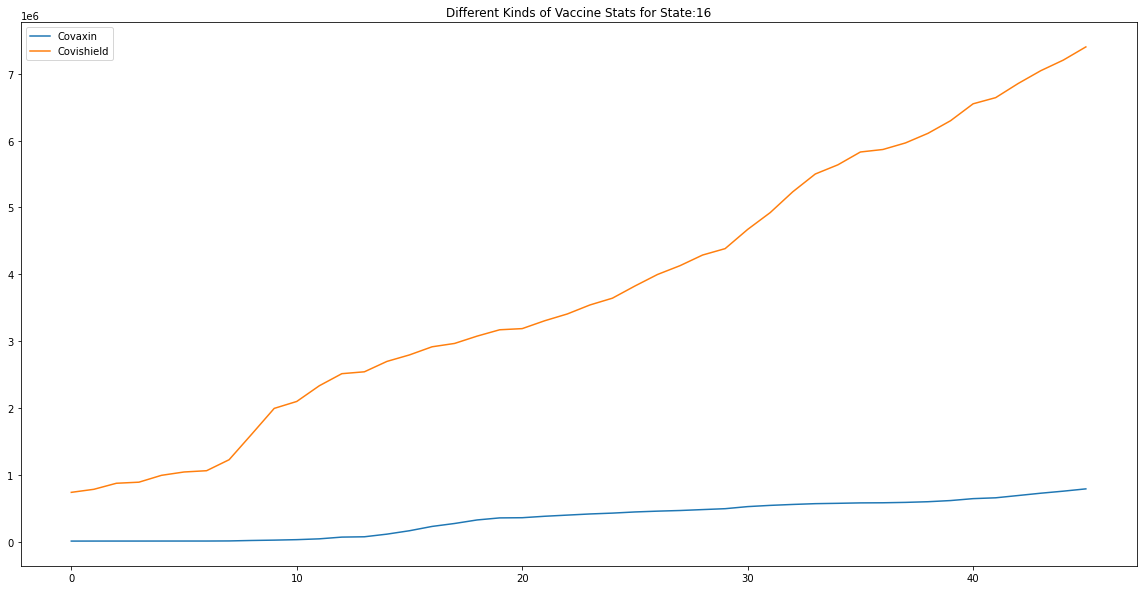

In [54]:
def get_district_changes(district_code, state_code):
    df, df_district = get_state_dfs(state_code)
    df_some_district = df_district.loc[df_district['district_id'] == district_code]
    dfi.export(df_some_district,f"datatable_{state_code}_{district_code}.png")
    return df_some_district

def plot_district_changes(district_code, state_code):
    plt.figure(figsize=(20,10))
    df_some_district = get_district_changes(district_code, state_code)
    plt.plot(df_some_district['vaccinatated_in_district_partial_and_total'], label = 'All Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_total'], label = 'Completed Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_partial'], label = 'Partial Vaccinations')
    plt.legend()
    plt.title(f'Vaccination Curves for District Number {district_code}')
    plt.savefig(f'district_changes_{district_code}_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
    
def plot_genderwise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['vacc_male'], label = 'Male Vaccination')
    plt.plot(df['vacc_female'], label = 'Female Vaccinations')
    plt.plot(df['vacc_others'], label = 'Other Vaccinations')
    plt.title(f'Gender Wise Stats for State:{state_code}')
    plt.legend()
    plt.savefig(f'genderwise_state_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)

def plot_dosewise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['total_dose_1'], label = 'Total Dose 1')
    plt.plot(df['total_dose_2'], label = 'Total Dose 2')
    plt.plot(df['total_doses'], label = 'Total Doses')
    plt.legend()
    plt.title(f'Dose Wise Stats for State:{state_code}')
    plt.savefig(f'dosewise_state_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_site_stats(state_code):
    plt.figure(figsize=(20,10))
    df, df_district = get_state_dfs(state_code)
    plt.plot(df['total_sites'], label = 'Total Sites')
    plt.plot(df['govt_sites'], label = 'Government Sites')
    plt.plot(df['pvt_sites'], label = 'Private Sites')
    plt.legend()
    plt.title(f'Site wise Stats for State:{state_code}')
    plt.savefig(f'site_stats_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_diff_vacc(state_code):
    plt.figure(figsize=(20,10))
    df, df_district = get_state_dfs(state_code)
    plt.plot(df['covaxin'], label = 'Covaxin')
    plt.plot(df['covishield'], label = 'Covishield')
    plt.legend()
    plt.title(f'Different Kinds of Vaccine Stats for State:{state_code}')
    plt.savefig(f'diff_vaccine_stats_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
plot_diff_vacc(16)

In [55]:
ls

[{'topBlock': {'sites': {'total': 2691,
    'govt': 2331,
    'pvt': 360,
    'today': None},
   'sessions': {'total': 331650, 'govt': 274450, 'pvt': 57200, 'today': None},
   'registration': {'total': None,
    'male': None,
    'female': None,
    'others': None,
    'today': None},
   'vaccination': {'total': 743007,
    'male': 341256,
    'female': 401647,
    'others': 104,
    'covishield': 736102,
    'covaxin': 6852,
    'today': 63344}},
  'vaccinationDoneByTime': [{'ts': '2021-03-08T06:00:00.000Z',
    'timestamps': '2021-03-08T12:00:00.000Z',
    'label': '12:00-13:00',
    'count': 8364,
    'dose_one': 6263,
    'dose_two': 2101},
   {'ts': '2021-03-08T08:00:00.000Z',
    'timestamps': '2021-03-08T14:00:00.000Z',
    'label': '14:00-15:00',
    'count': 9066,
    'dose_one': 6539,
    'dose_two': 2527},
   {'ts': '2021-03-08T10:00:00.000Z',
    'timestamps': '2021-03-08T16:00:00.000Z',
    'label': '16:00-17:00',
    'count': 9476,
    'dose_one': 6036,
    'dose_two': 34

In [56]:
def prep_for_pdf(state_code, district_code):
    WIDTH = 210
    HEIGHT = 297
    pdf = FPDF()
    pdf.add_page()
    pdf.ln(60)
    pdf.set_font('Arial', 'B', 16)
    pdf.write(25, f'COVID Vaccine Analysis Report for State: {state_code}, District: {district_code}')
    pdf.ln(20)
    pdf.write(5, '''This report analyzes the following:
              - The Number of Site Statistics for the State
              - Gender Wise Vaccination Distribution in the State
              - Dose Wise Statistics for the State
              - Statistics for Different Kinds of Vaccine in the State
              - Number of Vaccinations in the District
              - Data Table for the Vaccination Trends in the District
              ''')
    pdf.ln(40)
    pdf.add_page()
    get_district_changes(district_code, state_code)
    plot_district_changes(district_code, state_code)
    plot_genderwise_state(state_code)
    plot_dosewise_state(state_code)
    plot_site_stats(state_code)
    plot_diff_vacc(state_code)
    pdf.image(f'site_stats_{state_code}.png',5, 10, WIDTH-10)
    pdf.image(f'genderwise_state_{state_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'dosewise_state_{state_code}.png',5, 10, WIDTH-10)
    pdf.image(f'diff_vaccine_stats_{state_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'district_changes_{district_code}_{state_code}.png',5, 10, WIDTH-10)
    pdf.add_page()
    pdf.image(f'datatable_{state_code}_{district_code}.png',5,10, 200)
    pdf.output(f'State_{state_code}_district_{district_code}' + '.pdf')

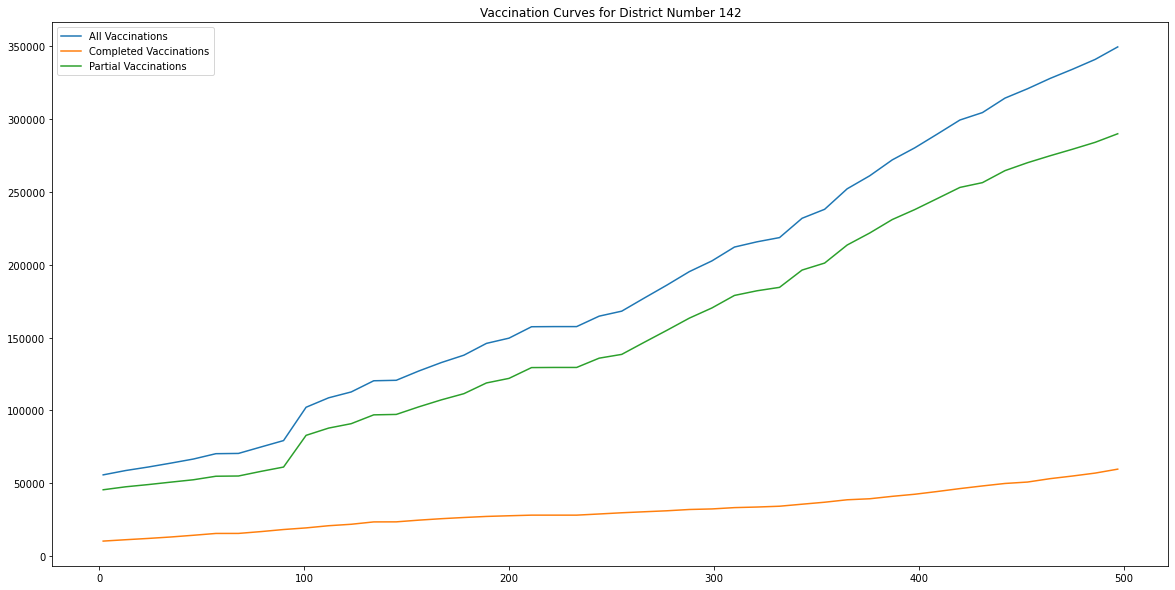

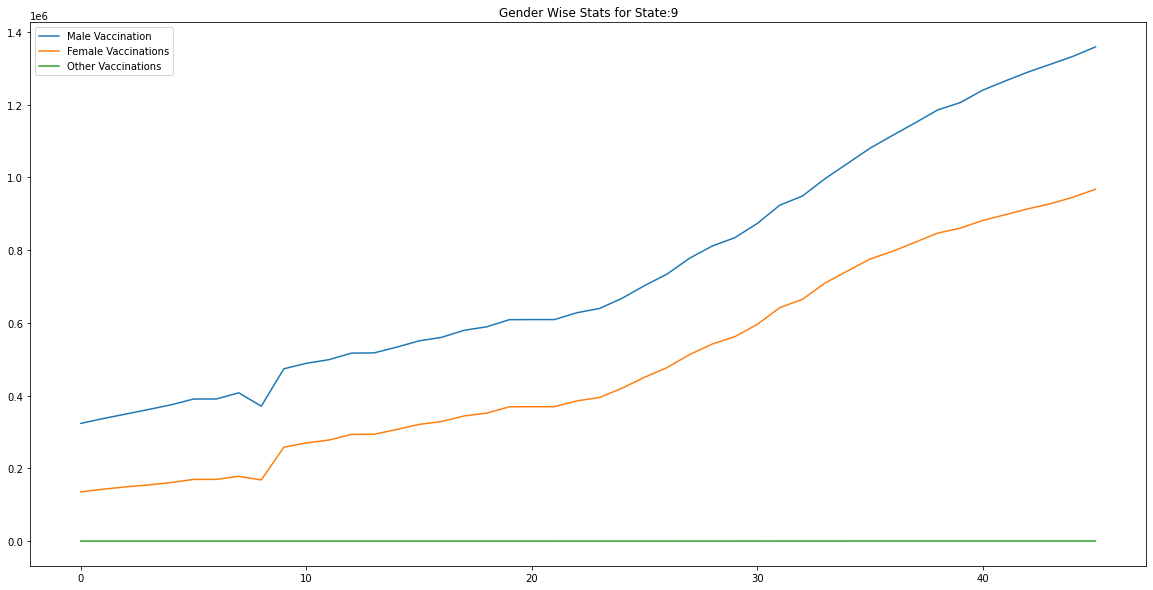

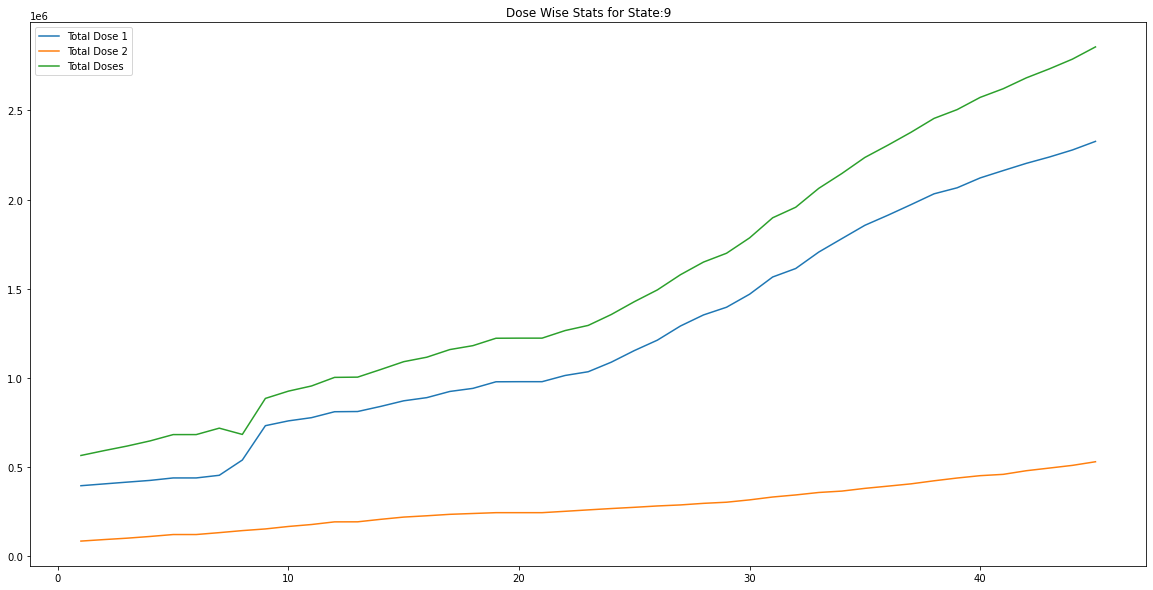

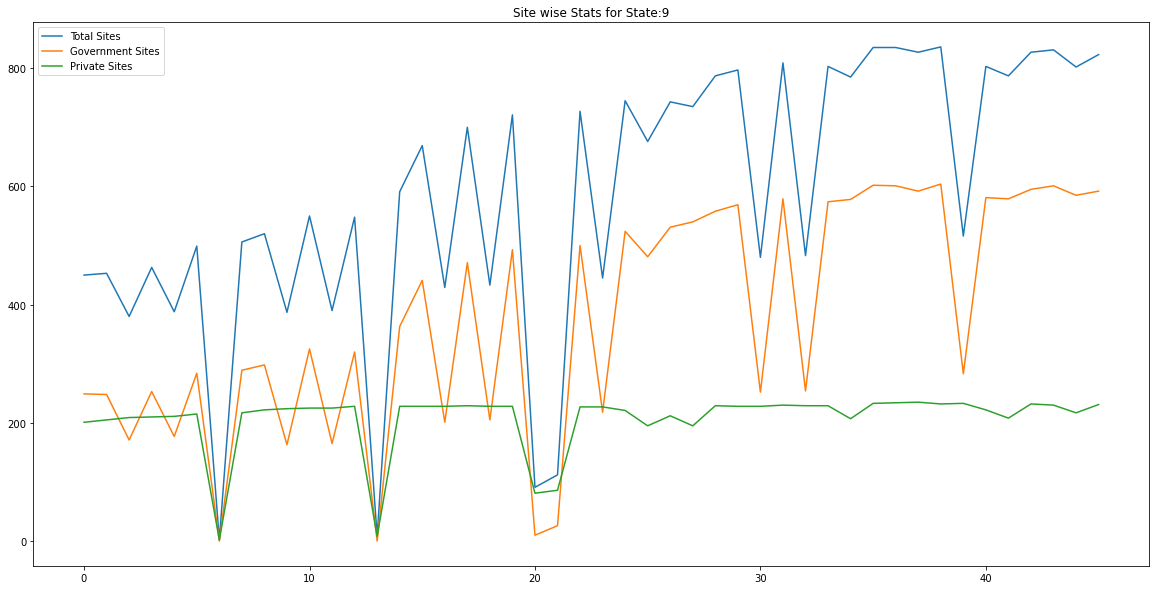

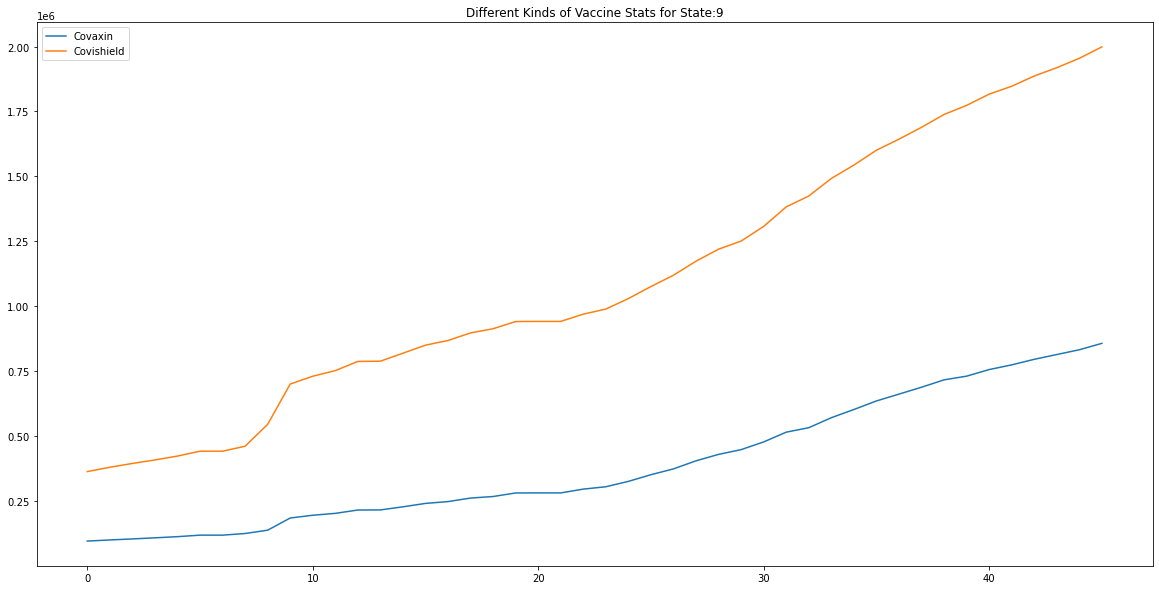

In [57]:
prep_for_pdf(9, 142)

# District Analysis

In [114]:
def get_district_data(state_code, district_code):
    ls = []
    ls_for_index = []
    for index, filename in enumerate(os.scandir(directory)):
        if filename.is_file():
            if str(filename.path).startswith(f'data\CoWIN_IN_{state_code}_{district_code}_2021'):
                f = open(filename.path,)
                data = json.load(f)
                ls.append(data)
                ls_for_index.append(' '.join(list(filename.path.split('\\')[1].split('.')[0].split(f'{district_code}_')[1].split('-'))))
    return ls, ls_for_index

In [115]:
ls, ls_for_index = get_district_data(5,83)

In [116]:
def get_district_dfs(state_code, district_code):
    
    ls, ls_for_index = get_district_data(state_code, district_code)
    df_district_wise = pd.DataFrame() 
    df_district_wise['date-index'] = ls_for_index
    df_district_wise['date-index'] =  pd.to_datetime(df_district_wise['date-index'], format='%Y %m %d')
    df_district_wise.reset_index().set_index('date-index')
    
    ls_total_sites = []
    
    for i in range(len(ls)):
        try:
            ls_total_sites.append(ls[i]['topBlock']['sites']['total'])
        except:
            ls_total_sites.append(None)
    df_district_wise['total_sites'] = ls_total_sites

    ls_govt_sites = []
    for i in range(len(ls)):
        try:
            ls_govt_sites.append(ls[i]['topBlock']['sites']['govt'])
        except:
            ls_govt_sites.append(None)
    df_district_wise['govt_sites'] = ls_govt_sites

    ls_pvt_sites = []
    for i in range(len(ls)):
        try:
            ls_pvt_sites.append(ls[i]['topBlock']['sites']['pvt'])
        except:
            ls_pvt_sites.append(None)
    df_district_wise['pvt_sites'] = ls_pvt_sites


    ls_total_sessions = []
    for i in range(len(ls)):
        try:
            ls_total_sessions.append(ls[i]['topBlock']['sessions']['total'])
        except:
            ls_total_sessions.append(None)
    df_district_wise['total_sessions'] = ls_total_sessions

    ls_govt_sessions = []
    for i in range(len(ls)):
        try:
            ls_govt_sessions.append(ls[i]['topBlock']['sessions']['govt'])
        except:
            ls_govt_sessions.append(None)
    df_district_wise['govt_sessions'] = ls_govt_sessions

    ls_pvt_sessions = []
    for i in range(len(ls)):
        try:
            ls_pvt_sessions.append(ls[i]['topBlock']['sessions']['pvt'])
        except:
            ls_pvt_sessions.append(None)
    df_district_wise['pvt_sessions'] = ls_pvt_sessions

    ls_total_vaccine_cumulative = []
    for i in range(len(ls)):
        try:
            ls_total_vaccine_cumulative.append(ls[i]['topBlock']['vaccination']['total'])
        except:
            ls_total_vaccine_cumulative.append(None)
    df_district_wise['total_vacc_cumulative'] = ls_total_vaccine_cumulative

    ls_vac_male = []
    for i in range(len(ls)):
        try:
            ls_vac_male.append(ls[i]['topBlock']['vaccination']['male'])
        except:
            ls_vac_male.append(None)
    df_district_wise['vacc_male'] = ls_vac_male

    ls_vac_female = []
    for i in range(len(ls)):
        try:
            ls_vac_female.append(ls[i]['topBlock']['vaccination']['female'])
        except:
            ls_vac_female.append(None)
    df_district_wise['vacc_female'] = ls_vac_female
    
    ls_vac_others = []
    for i in range(len(ls)):
        try:
            ls_vac_others.append(ls[i]['topBlock']['vaccination']['others'])
        except:
            ls_vac_others.append(None)
    df_district_wise['vacc_others'] = ls_vac_others

    ls_covishield = []
    for i in range(len(ls)):
        try:
            ls_covishield.append(ls[i]['topBlock']['vaccination']['covishield'])
        except:
            ls_covishield.append(None)
    df_district_wise['covishield'] = ls_covishield
    
    ls_covaxin = []
    for i in range(len(ls)):
        try:
            ls_covaxin.append(ls[i]['topBlock']['vaccination']['covaxin'])
        except:
            ls_covaxin.append(None)
    df_district_wise['covaxin'] = ls_covaxin
    
    ls_today = []
    for i in range(len(ls)):
        try:
            ls_today.append(ls[i]['topBlock']['vaccination']['today'])
        except:
            ls_today.append(None)
    df_district_wise['today'] = ls_today
    
    ls_total_dose_1 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_1.append(ls[i]['topBlock']['vaccination']['tot_dose_1'])
        except:
            ls_total_dose_1.append(None)
    df_district_wise['total_dose_1'] = ls_total_dose_1
    
    ls_total_dose_2 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_2.append(ls[i]['topBlock']['vaccination']['tot_dose_2'])
        except:
            ls_total_dose_2.append(None)
    df_district_wise['total_dose_2'] = ls_total_dose_2
    
    ls_total_doses = []
    for i in range(len(ls)):
        try:
            ls_total_doses.append(ls[i]['topBlock']['vaccination']['total_doses'])
        except:
            ls_total_doses.append(None)
    df_district_wise['total_doses'] = ls_total_doses
    
    ls_vac_18_25 = []
    for i in range(len(ls)):
        try:
            ls_vac_18_25.append(ls[i]['vaccinationByAge']['vac_18_25'])
        except:
            ls_vac_18_25.append(None)
    df_district_wise['vac_18_25'] = ls_vac_18_25
    
    ls_vac_25_40 = []
    for i in range(len(ls)):
        try:
            ls_vac_25_40.append(ls[i]['vaccinationByAge']['vac_25_40'])
        except:
            ls_vac_25_40.append(None)
    df_district_wise['vac_25_40'] = ls_vac_25_40
    
    ls_vac_40_60 = []
    for i in range(len(ls)):
        try:
            ls_vac_40_60.append(ls[i]['vaccinationByAge']['vac_40_60'])
        except:
            ls_vac_40_60.append(None)
    df_district_wise['vac_40_60'] = ls_vac_40_60
    
    ls_vac_above_60 = []
    for i in range(len(ls)):
        try:
            ls_vac_above_60.append(ls[i]['vaccinationByAge']['above_60'])
        except:
            ls_vac_above_60.append(None)
    df_district_wise['vac_above_60'] = ls_vac_above_60
    
    ls_session_site_id = []
    ls_session_site_name = []
    ls_title = []
    ls_vacc_session_site = []
    ls_total_vacc_session_site = []
    ls_partial_vacc_session_site = []
    df_session_site = pd.DataFrame() 
    for i in range(len(ls)):
        for j in range(len((ls[i]['getBeneficiariesGroupBy']))):
            try:
                ls_session_site_id.append(ls[i]['getBeneficiariesGroupBy'][j]['session_site_id'])
            except:
                ls_session_site_id.append(None)
            try:
                ls_session_site_name.append(ls[i]['getBeneficiariesGroupBy'][j]['session_site_name'])
            except:
                ls_session_site_name.append(None)
            try:
                ls_title.append(ls[i]['getBeneficiariesGroupBy'][j]['title'])
            except:
                ls_title.append(None)     
            try:
                ls_vacc_session_site.append(ls[i]['getBeneficiariesGroupBy'][j]['total'])
            except:
                ls_vacc_session_site.append(None)   
            try:
                ls_total_vacc_session_site.append(ls[i]['getBeneficiariesGroupBy'][j]['totally_vaccinated'])
            except:
                ls_total_vacc_session_site.append(None)   
            try:
                ls_partial_vacc_session_site.append(ls[i]['getBeneficiariesGroupBy'][j]['partial_vaccinated'])
            except:
                ls_partial_vacc_session_site.append(None)  
    df_session_site['session_site_id'] = ls_session_site_id
    df_session_site['session_site_name'] = ls_session_site_name
    df_session_site['title'] = ls_title
    df_session_site['vaccinatated_in_session_site_partial_and_total'] = ls_vacc_session_site
    df_session_site['vaccinatated_in_session_site_total'] = ls_total_vacc_session_site
    df_session_site['vaccinatated_in_session_site_partial'] = ls_partial_vacc_session_site
    return df_district_wise, df_session_site

In [117]:
df_district, df_session_site = get_district_dfs(16, 264)

In [139]:
df_district

,date-index,total_sites,govt_sites,pvt_sites,total_sessions,govt_sessions,pvt_sessions,total_vacc_cumulative,vacc_male,vacc_female,...,covishield,covaxin,today,total_dose_1,total_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,vac_above_60
0,2021-03-08,183,172,11,21900,20300,1600,48613,21680,26928,...,48612,0,3019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-09,99,88,11,11800,10100,1700,50802,22821,27976,...,50801,0,2189,29173.0,21629.0,72431.0,NaN,NaN,NaN,NaN
2,2021-03-10,182,170,12,21200,19400,1800,55062,25091,29966,...,55061,0,4260,32356.0,22706.0,77768.0,NaN,NaN,NaN,NaN
3,2021-03-11,0,0,0,0,0,0,55064,25092,29967,...,55063,0,1,32357.0,22707.0,77771.0,NaN,NaN,NaN,NaN
4,2021-03-12,182,169,13,20900,18800,2100,60285,28049,32229,...,60284,0,5221,36277.0,24008.0,84293.0,NaN,NaN,NaN,NaN
5,2021-03-13,11,3,8,1500,500,1000,60846,28268,32571,...,60845,0,561,36569.0,24277.0,85123.0,NaN,NaN,NaN,NaN
6,2021-03-14,4,3,1,500,400,100,60876,28283,32586,...,60875,0,30,36599.0,24277.0,85153.0,NaN,NaN,NaN,NaN
7,2021-03-15,192,178,14,21780,19880,1900,68612,32336,36269,...,68385,226,7736,43384.0,25228.0,93840.0,NaN,NaN,NaN,NaN
8,2021-03-16,115,97,18,13480,10980,2500,67971,32054,35909,...,93352,618,3916,67971.0,25999.0,93970.0,NaN,NaN,NaN,NaN
9,2021-03-17,201,180,21,23480,20380,3100,79081,37801,41271,...,104802,1039,9592,79081.0,26760.0,105841.0,NaN,NaN,NaN,NaN


In [119]:
df_session_site

,session_site_id,session_site_name,title,vaccinatated_in_session_site_partial_and_total,vaccinatated_in_session_site_total,vaccinatated_in_session_site_partial
0,430134,Shiraguppi PHC Athani,Shiraguppi PHC Athani,118,81,37
1,430197,Sankaratti PHCi,Sankaratti PHCi,67,57,10
2,430224,Kagwad CHC Athani,Kagwad CHC Athani,94,81,13
3,430225,Athani GH,Athani GH,660,239,421
4,430263,BUDARKATTI PHC,BUDARKATTI PHC,63,63,0
...,...,...,...,...,...,...
17001,686484,KASAI GALLI SC RUKMINI NAGAR,KASAI GALLI SC RUKMINI NAGAR,180,5,175
17002,686857,Adahalli SC Athani,Adahalli SC Athani,61,3,58
17003,686967,AMBEDKAR NAGAR SC VINAYAKNAGAR,AMBEDKAR NAGAR SC VINAYAKNAGAR,513,28,485
17004,687079,Satti-A SC Athani,Satti-A SC Athani,22,0,22


In [147]:
def get_session_site_changes(district_code, state_code, session_site_id):
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    df_some_session_site = df_session_site.loc[df_session_site['session_site_id'] == session_site_id]
    dfi.export(df_some_session_site,f"datatable_{state_code}_{district_code}_{session_site_id}.png")
    return df_some_session_site

def plot_session_site_changes(district_code, state_code, session_site_id):
    plt.figure(figsize=(20,10))
    df_some_session_site = get_session_site_changes(district_code, state_code, session_site_id)
    plt.plot(df_some_session_site['vaccinatated_in_session_site_partial_and_total'], label = 'All Vaccinations')
    plt.plot(df_some_session_site['vaccinatated_in_session_site_total'], label = 'Completed Vaccinations')
    plt.plot(df_some_session_site['vaccinatated_in_session_site_partial'], label = 'Partial Vaccinations')
    plt.legend()
    plt.title(f'Vaccination Curves for Session Site Number {session_site_id}')
    plt.savefig(f'session_site_changes_{district_code}_{state_code}_{session_site_id}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_agewise_district(state_code, district_code):
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    plt.figure(figsize=(20,10))
    plt.plot(df_district_wise['vac_18_25'], label = 'Vaccinations between 18 & 25')
    plt.plot(df_district_wise['vac_25_40'], label = 'Vaccinations between 25 & 40')
    plt.plot(df_district_wise['vac_40_60'], label = 'Vaccinations between 40 & 60')
    plt.plot(df_district_wise['vac_above_60'], label = 'Vaccinations Above 60')
    plt.title(f'Age Wise Stats for District: {district_code}')
    plt.legend()
    plt.savefig(f'agewise_district_{district_code}_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_genderwise_district(state_code, district_code):
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    plt.figure(figsize=(20,10))
    plt.plot(df_district_wise['vacc_male'], label = 'Male Vaccination')
    plt.plot(df_district_wise['vacc_female'], label = 'Female Vaccinations')
    plt.plot(df_district_wise['vacc_others'], label = 'Other Vaccinations')
    plt.title(f'Gender Wise Stats for District: {district_code}')
    plt.legend()
    plt.savefig(f'genderwise_district_{district_code}_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)

def plot_dosewise_district(state_code, district_code):
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    plt.figure(figsize=(20,10))
    plt.plot(df_district_wise['total_dose_1'], label = 'Total Dose 1')
    plt.plot(df_district_wise['total_dose_2'], label = 'Total Dose 2')
    plt.plot(df_district_wise['total_doses'], label = 'Total Doses')
    plt.legend()
    plt.title(f'Dose Wise Stats for District:{district_code}')
    plt.savefig(f'dosewise_district_{state_code}_{district_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_site_stats(state_code, district_code):
    plt.figure(figsize=(20,10))
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    plt.plot(df_district_wise['total_sites'], label = 'Total Sites')
    plt.plot(df_district_wise['govt_sites'], label = 'Government Sites')
    plt.plot(df_district_wise['pvt_sites'], label = 'Private Sites')
    plt.legend()
    plt.title(f'Site wise Stats for District:{district_code}')
    plt.savefig(f'site_stats_{state_code}_{district_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_diff_vacc(state_code, district_code):
    plt.figure(figsize=(20,10))
    df_district_wise, df_session_site = get_district_dfs(state_code, district_code)
    plt.plot(df_district_wise['covaxin'], label = 'Covaxin')
    plt.plot(df_district_wise['covishield'], label = 'Covishield')
    plt.legend()
    plt.title(f'Different Kinds of Vaccine Stats for District: {district_code}')
    plt.savefig(f'diff_vaccine_stats_{state_code}_{district_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    

In [154]:
def prep_for_pdf_session(state_code, district_code, session_site_id):
    WIDTH = 210
    HEIGHT = 297
    pdf = FPDF()
    pdf.add_page()
    pdf.ln(60)
    pdf.set_font('Arial', 'B', 14)
    pdf.write(25, f'COVID Vaccine Analysis Report for State: {state_code}, District: {district_code}, Session Site: {session_site_id}')
    pdf.ln(20)
    pdf.set_font('Arial', 'B', 12)
    pdf.write(5, '''This report analyzes the following:
              - The Number of Site Statistics for the District
              - Gender Wise Vaccination Distribution in the District
              - Dose Wise Statistics for the District
              - Statistics for Different Kinds of Vaccine in the District
              - Age Wise Vaccination Trends
              - Number of Vaccinations in the Session Site
              - Data Table for the Vaccination Trends in the Session Site
              ''')
    pdf.ln(40)
    pdf.add_page()
    get_session_site_changes(district_code, state_code, session_site_id)
    plot_session_site_changes(district_code, state_code, session_site_id)
    plot_genderwise_district(state_code, district_code)
    plot_dosewise_district(state_code, district_code)
    plot_site_stats(state_code, district_code)
    plot_diff_vacc(state_code, district_code)
    plot_genderwise_district(state_code, district_code)
    pdf.image(f'site_stats_{state_code}_{district_code}.png',5, 10, WIDTH-10)
    pdf.image(f'genderwise_district_{district_code}_{state_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'dosewise_district_{state_code}_{district_code}.png',5, 10, WIDTH-10)
    pdf.image(f'diff_vaccine_stats_{state_code}_{district_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'agewise_district_{district_code}_{state_code}.png',5, 10, WIDTH-10)
    pdf.image(f'session_site_changes_{district_code}_{state_code}_{session_site_id}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'datatable_{state_code}_{district_code}_{session_site_id}.png',5,10, 200)
    pdf.output(f'State_{state_code}_district_{district_code}_session_site_{session_site_id}' + '.pdf')

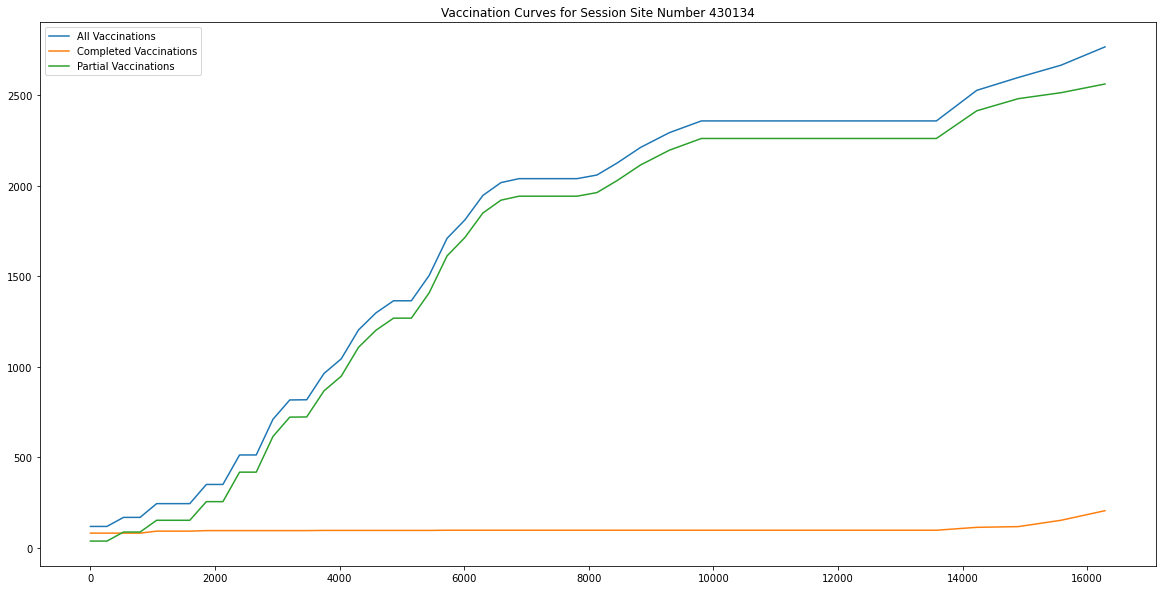

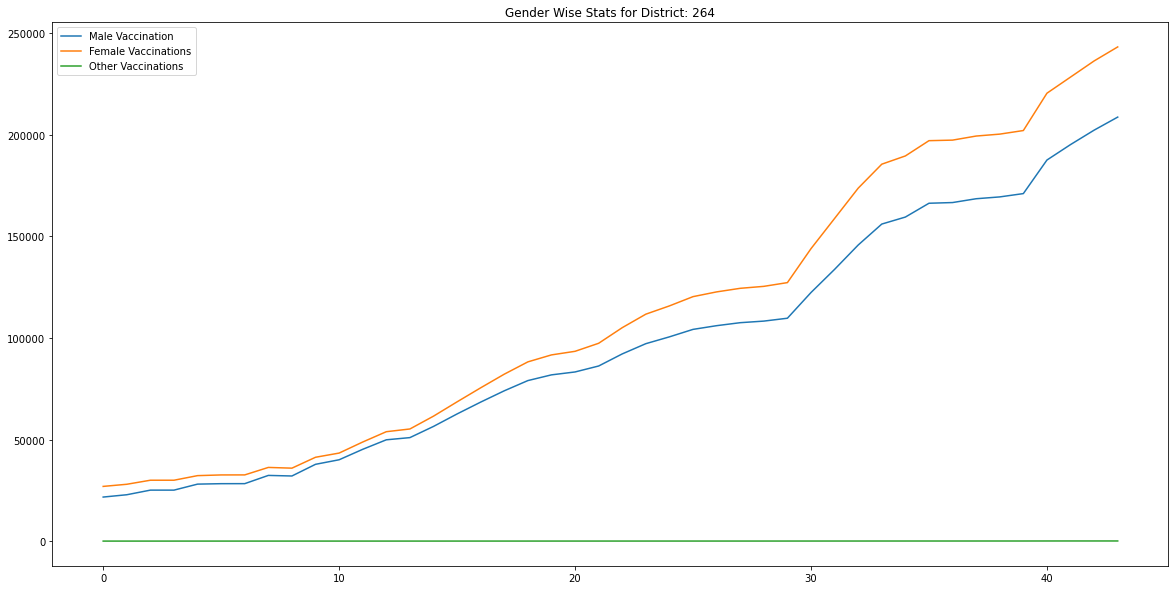

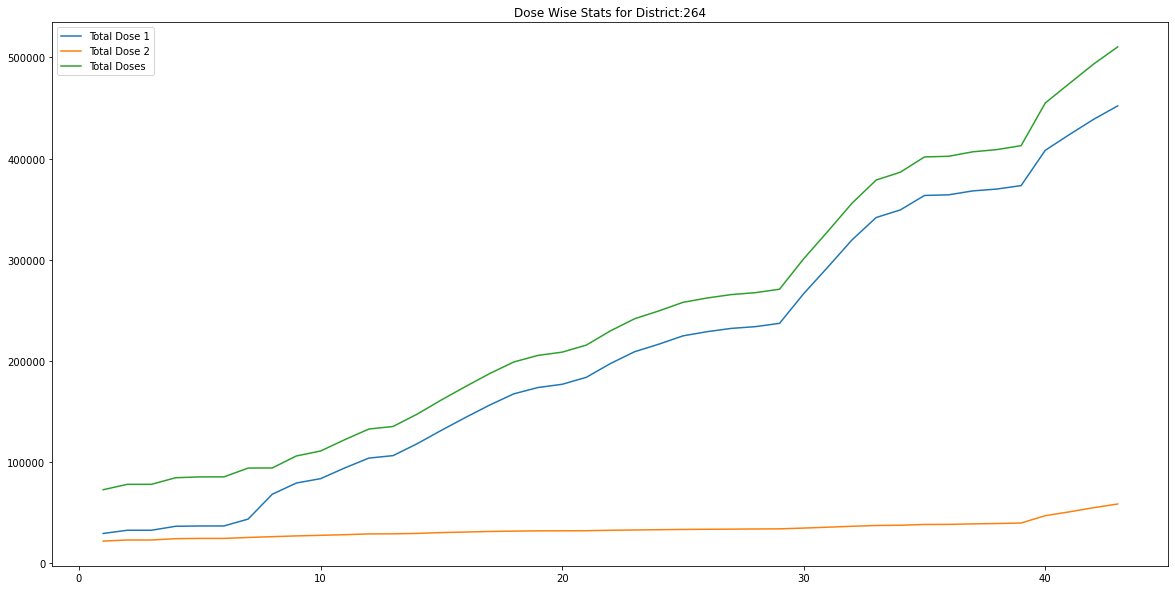

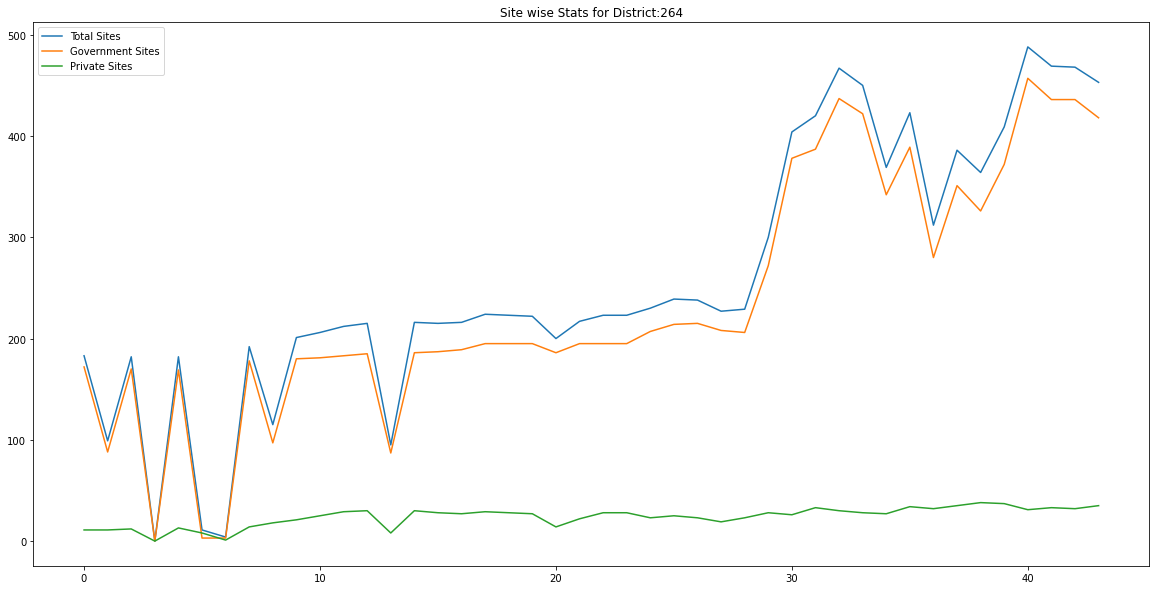

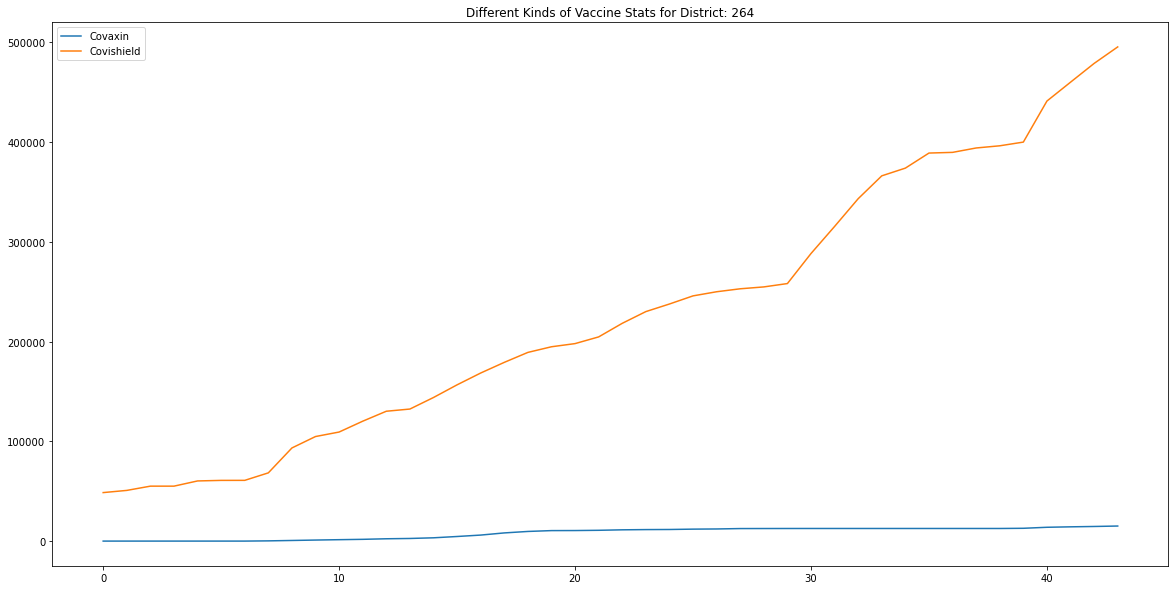

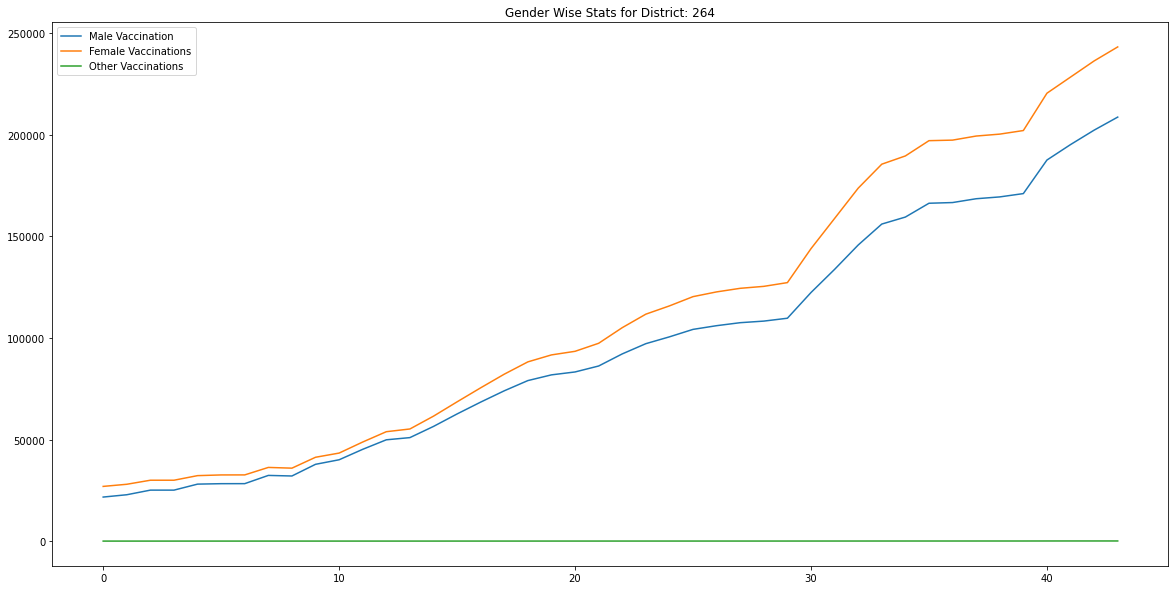

In [155]:
prep_for_pdf_session(16, 264, 430134)